In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import cluster
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances_argmin

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [3]:
# Read the data
features = pd.read_csv('./medical/historical_X.dat', header=None, sep=" ").values
actions = pd.read_csv('./medical/historical_A.dat', header=None, sep=" ").values
outcome = pd.read_csv('./medical/historical_Y.dat', header=None, sep=" ").values
observations = features[:, :128]
labels = features[:,128] + features[:,129]*2

In [8]:
features.shape

(10000, 130)

In [9]:
actions.shape

(10000, 1)

In [10]:
outcome.shape

(10000, 1)

In [12]:
observations.shape

(10000, 128)

In [14]:
labels.shape

(10000,)

In [4]:
np.random.seed(200)
Xtrain, Xholdout, ytrain, yholdout = train_test_split(features, outcome, test_size = 0.5)

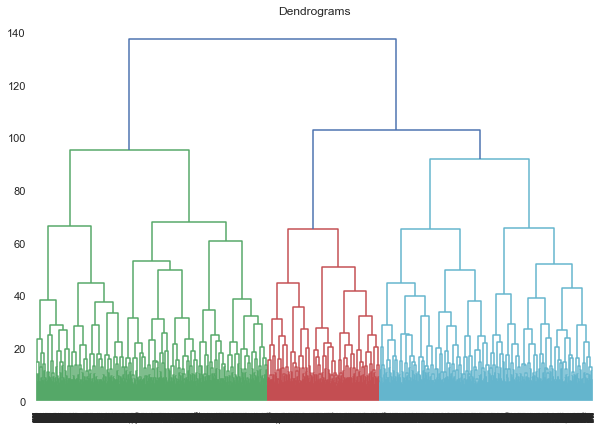

In [4]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(Xtrain, method='ward'))
plt.show()